In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

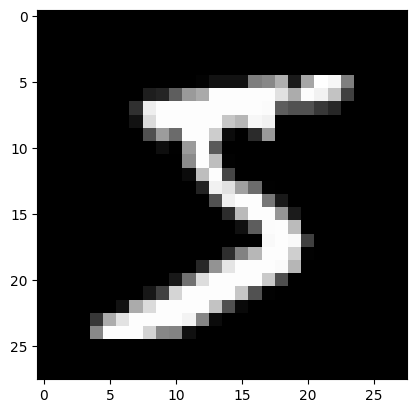

In [ ]:
plt.imshow(single_image,cmap='gray')
#212222230086
#Mukesh V

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

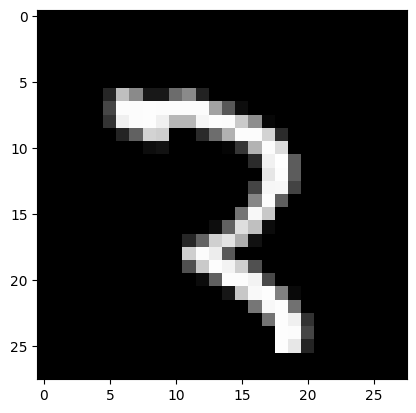

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,618 (596.16 KB)

 Trainable params: 152,618 (596.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 95ms/step - accuracy: 0.8765 - loss: 0.4125 - val_accuracy: 0.9780 - val_loss: 0.0701
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 66ms/step - accuracy: 0.9826 - loss: 0.0600 - val_accuracy: 0.9826 - val_loss: 0.0512
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9851 - val_loss: 0.0452
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 0.9871 - val_loss: 0.0381


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()
#Mukesh V

,accuracy,loss,val_accuracy,val_loss
0,0.941417,0.198402,0.9790,0.065663
1,0.981317,0.059692,0.9813,0.058953
2,0.987067,0.041117,0.9864,0.039094
3,0.990417,0.029786,0.9866,0.038366
4,0.992583,0.023568,0.9876,0.041982


<Axes: >

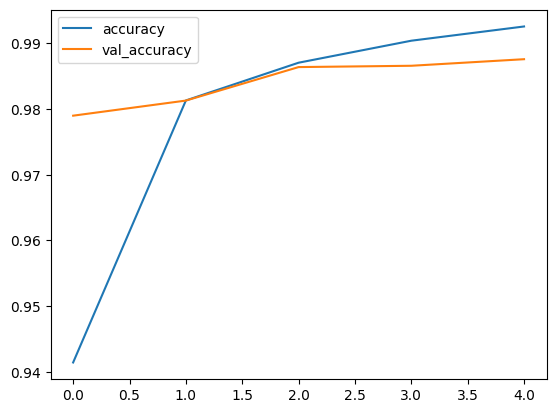

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
#Mukesh V

<Axes: >

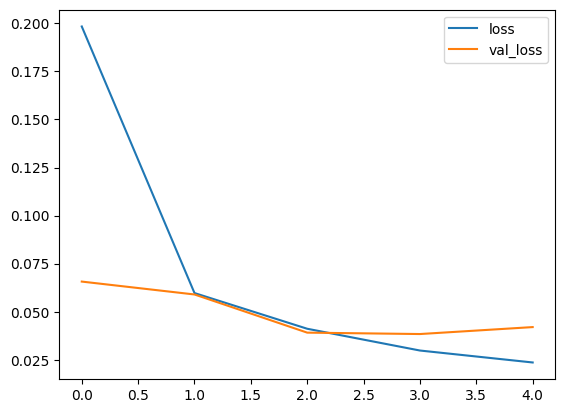

In [ ]:
metrics[['loss','val_loss']].plot()
#Mukesh V

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 972    0    2    0    0    0    3    0    0    3]
 [   0 1127    0    2    0    1    4    0    1    0]
 [   0    2 1015    2    3    0    1    9    0    0]
 [   0    0    1 1004    0    4    0    1    0    0]
 [   0    0    0    0  972    0    2    0    0    8]
 [   0    0    0    4    0  886    2    0    0    0]
 [   1    1    0    0    1    4  950    0    1    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   5    0    0    4    1    9    3    4  944    4]
 [   0    1    0    3    4    5    0    7    3  986]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('/content/imagetwo.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('imagetwo.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
print(x_single_prediction)

[3]


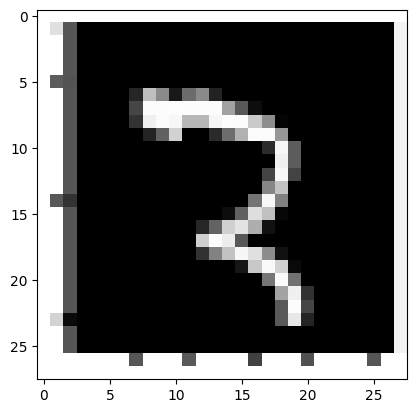

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
print(x_single_prediction)

[2]
